# **📈⏰ Time Series Analysis**

#**Part 1: Getting to Know the Basics**

## **🔃 Load the Time Series Data**

### **📚 Importing Necessary Libraries**

In [ ]:
# Importing necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import torch
from matplotlib import pyplot as plt
from datetime import datetime

## **✈️ Airline Passengers Dataset**

In [ ]:
# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/3éme ING/S6/DA/AirPassengers.csv')

# Display the first few rows
print("📋 First 5 rows of the dataset:")
display(data1.head())

# Check the shape of the dataset
print("\n🧮 Shape of the dataset (rows, columns):", data1.shape)

# Display column data types and missing values
print("\n📊 Dataset information:")
data1.info()

# Summarize the dataset
print("\n📈 Summary of the dataset:")
print(data1.describe())

📋 First 5 rows of the dataset:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121



🧮 Shape of the dataset (rows, columns): (144, 2)

📊 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB

📈 Summary of the dataset:
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


In [ ]:
## Convert Month Column to Datetime
data1['Month'] = pd.to_datetime(data1['Month'])
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


,Month,#Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


### **📈 Plot the Raw Data & Enhancing the Plot with Multiple Features**

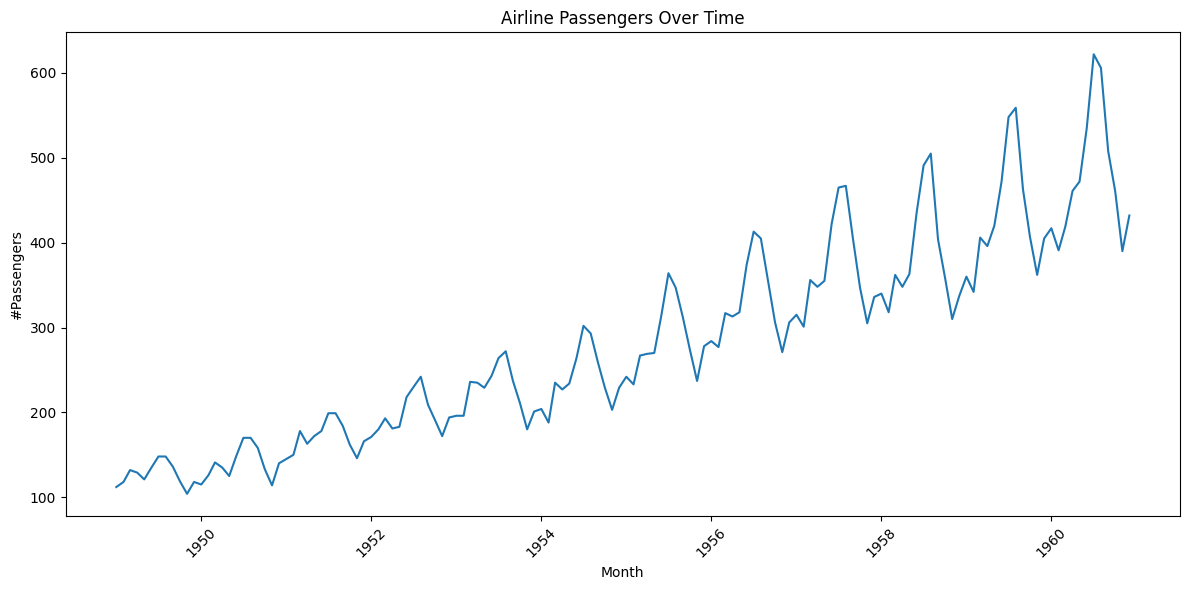

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data1['Month'], data1['#Passengers'])
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Airline Passengers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

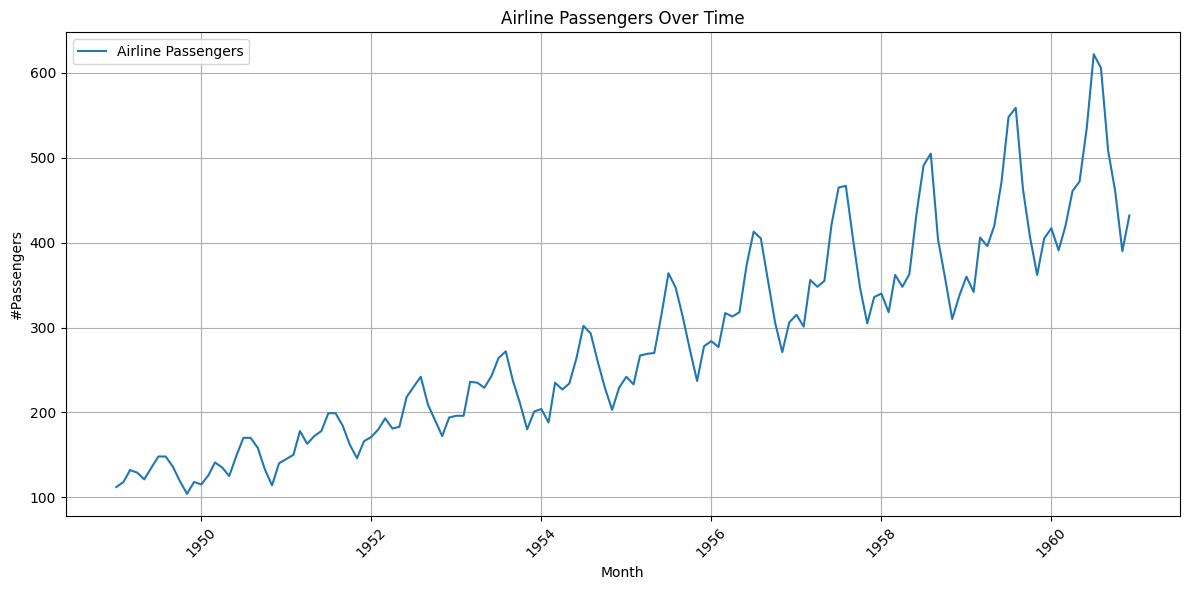

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data1['Month'], data1['#Passengers'], label='Airline Passengers') # Added a label
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Airline Passengers Over Time')
plt.xticks(rotation=45)
plt.grid(True) # Added gridlines
plt.legend() # Added a legend to show the label
plt.tight_layout()
plt.show()

### **🔎 Zooming In on a Speciﬁc Time Period**

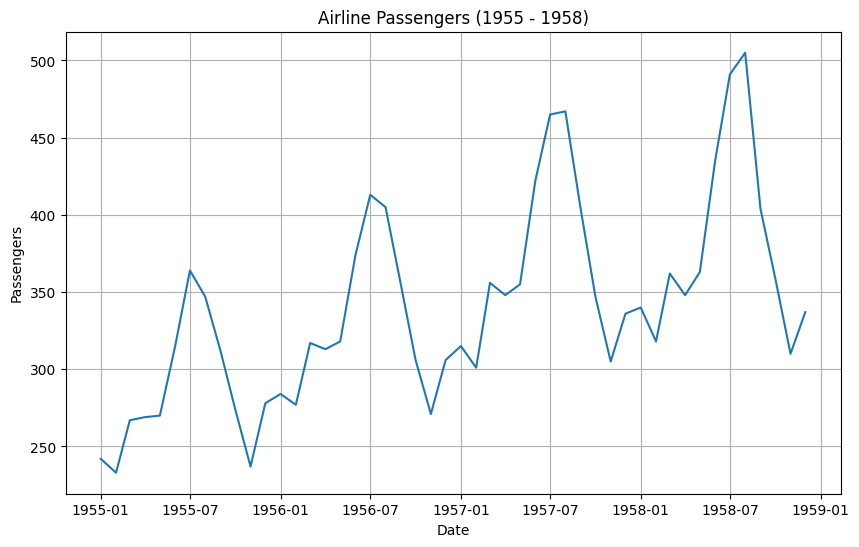

In [ ]:
# Set the 'Month' column as the index
data1.set_index('Month', inplace=True)

# Zoom in on data from 1955 to 1958
data_subset = data1['1955':'1958']

plt.figure(figsize=(10,6))
plt.plot(data_subset)
plt.title('Airline Passengers (1955 - 1958)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()


## **💳 Retail Sales Dataset**

In [ ]:
# Load the dataset
data2 = pd.read_csv('/content/drive/MyDrive/3éme ING/S6/DA/retail_sales_dataset.csv')

# Display the first few rows
print("📋 First 5 rows of the dataset:")
display(data2.head())

# Check the shape of the dataset
print("\n🧮 Shape of the dataset (rows, columns):", data2.shape)

# Display column data types and missing values
print("\n📊 Dataset information:")
data2.info()

# Summarize the dataset
print("\n📈 Summary of the dataset:")
print(data2.describe())

📋 First 5 rows of the dataset:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



🧮 Shape of the dataset (rows, columns): (1000, 9)

📊 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

📈 Summary of the dataset:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std  

In [ ]:
# Print the column names to check for the correct date column name
print("\nColumn names of data2:")
print(data2.columns)


Column names of data2:
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
## Convert Date Column to Datetime
data2['Date'] = pd.to_datetime(data2['Date'])
data2.info()
data2.set_index('Date', inplace=True, drop=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


### **🎇 Visualizing Multiple Time Series**

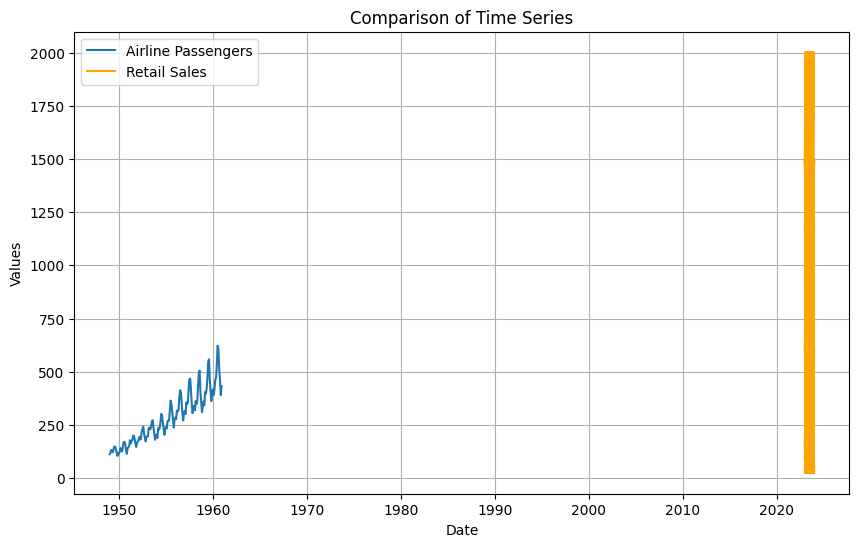

In [ ]:
# Assuming you want to plot the '#Passengers' column from 'data'
plt.figure(figsize=(10, 6))
plt.plot(data1['#Passengers'], label="Airline Passengers")
plt.plot(data2['Total Amount'], label="Retail Sales", color='orange')
plt.title('Comparison of Time Series')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


## **1. Trend (What is the overall pattern over time?)**
**Observation:**
* The number of airline passengers shows a **clear upward trend** over time.
* At the beginning of the dataset (around 1949), the number of passengers was around **100–150** per month.
* By the end of the dataset (1960), the number had increased to more than **600** passengers per month.

**Conclusion:**

✅ There is a **positive trend** , indicating a long-term increase in the number of airline passengers.

## **2. Seasonality (Are there repeating patterns at regular intervals?)**
**Observation:**

* Each year, there is a **repeating pattern** where passenger numbers rise during certain months and fall during others.
* Specifically, the number of passengers increases significantly during the **middle to later part of the year** (likely summer and early autumn) and decreases during the **early months of the year** (winter).

**Conclusion:**

✅ The data exhibits **clear seasonality** , with higher passenger counts occurring every year during the same time period.

## **3. Noise (Are there random fluctuations without a clear pattern?)**
**Observation:**

* While the general trend and seasonal patterns are clear, there are **small variations** from month to month that do not follow a consistent or predictable pattern.
* These irregular fluctuations may be due to unexpected events, measurement errors, or other unpredictable factors.

**Conclusion:**

✅ There is some **random noise** present in the data, which appears as small deviations from the expected values.

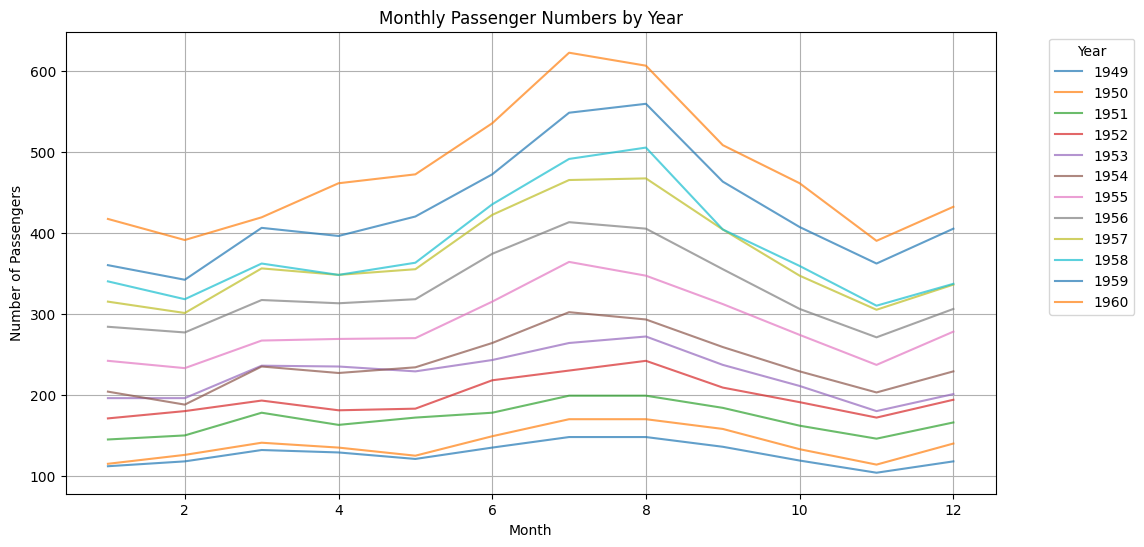

In [ ]:
plt.figure(figsize=(12, 6))
for year in data1.index.year.unique():
    subset = data1[data1.index.year == year]
    plt.plot(subset.index.month, subset['#Passengers'], label=str(year), alpha=0.7)

plt.title('Monthly Passenger Numbers by Year')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# **Part 2: Decomposition of Time Series**

## **🥢Choosing a Decomposition Model**
For the **Airline Passengers** dataset, since the seasonality appears to increase with the trend (e.g., higher peaks in later years), we will use the **multiplicative model** .

## **🐍 Performing Decomposition Using Python**

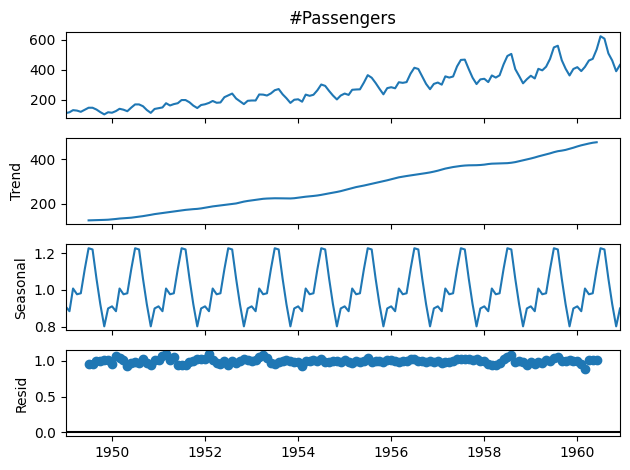

In [ ]:
# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform decomposition using the multiplicative model
result = seasonal_decompose(data1['#Passengers'], model='multiplicative', period=12)

# Plot the decomposition components
result.plot()
plt.show()

## **🔎 Zooming  In  on  Decomposed  Components**

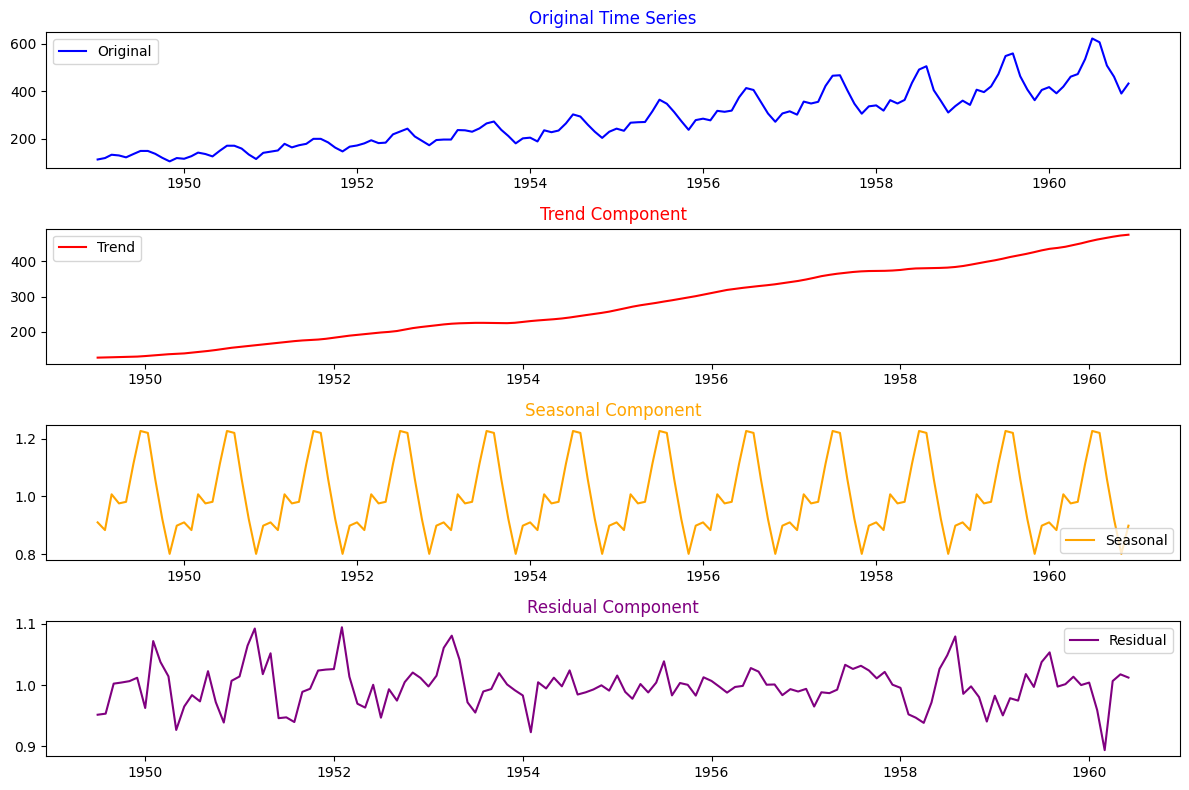

In [ ]:
# Extract Individual Components
trend_component = result.trend
seasonal_component = result.seasonal
residual_component = result.resid

# Plot Each Component Individually
# Plot individual components
plt.figure(figsize=(12, 8))

# Subplot 1: Original Time Series
plt.subplot(411)
plt.plot(data1, label='Original', color='blue')
plt.title('Original Time Series', color='blue')
plt.legend()

# Subplot 2: Trend Component
plt.subplot(412)
plt.plot(trend_component, label='Trend', color='red')
plt.title('Trend Component', color='red')
plt.legend()

# Subplot 3: Seasonal Component
plt.subplot(413)
plt.plot(seasonal_component, label='Seasonal', color='orange')
plt.title('Seasonal Component', color='orange')
plt.legend()

# Subplot 4: Residual Component
plt.subplot(414)
plt.plot(residual_component, label='Residual', color='purple')
plt.title('Residual Component', color='purple')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## **🎇 Decomposition Using Different Models**

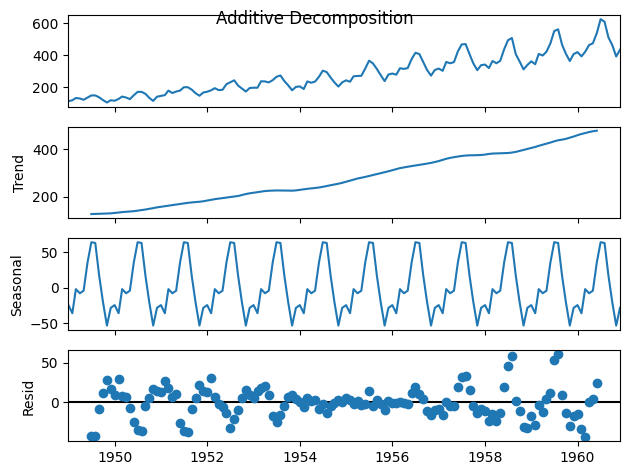

In [ ]:
# Additive decomposition
result_additive = seasonal_decompose(data1, model='additive', period=12)
result_additive.plot()
plt.suptitle('Additive Decomposition')
plt.show()

# **Part 3: Forecasting with Classical Models and Prophet**

## **1. ARIMA Model Implementation 🔮**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### **🧪 Stationarity Test**

In [ ]:
def check_stationarity(data1):
    # Perform ADF test
    result = adfuller(data1)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Interpretation
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

# Apply the function
check_stationarity(data1)

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### **⚙️ Differencing the Data**

In [ ]:
# Apply first-order differencing
data_diff = data1.diff().dropna()

# Re-check stationarity
check_stationarity(data_diff)

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### **🧗🏻‍♀️ Fitting the ARIMA Model**

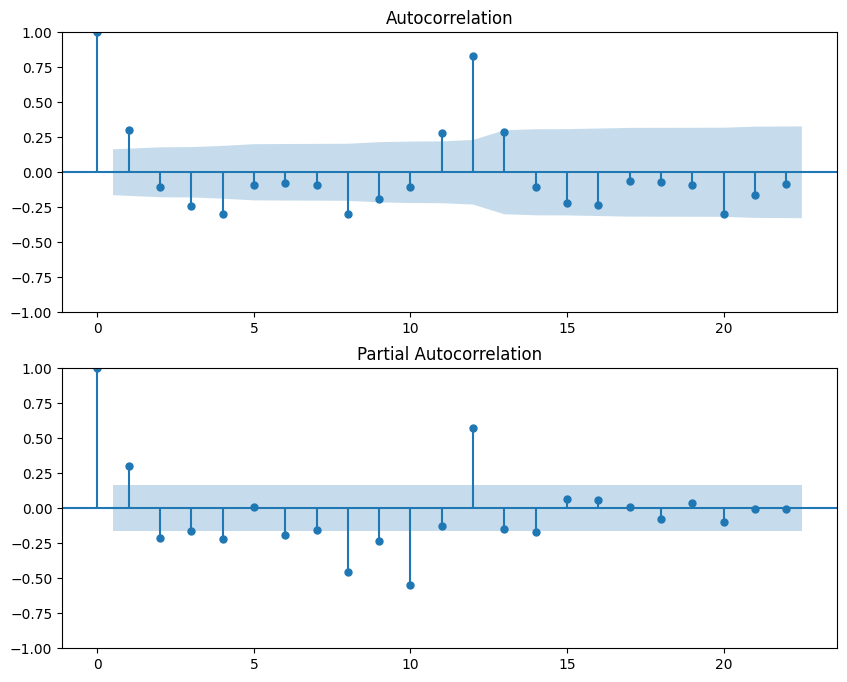

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

In [ ]:
# Fit the ARIMA model
model = ARIMA(data1, order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 25 May 2025   AIC                           1394.683
Time:                        19:27:07   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)

1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


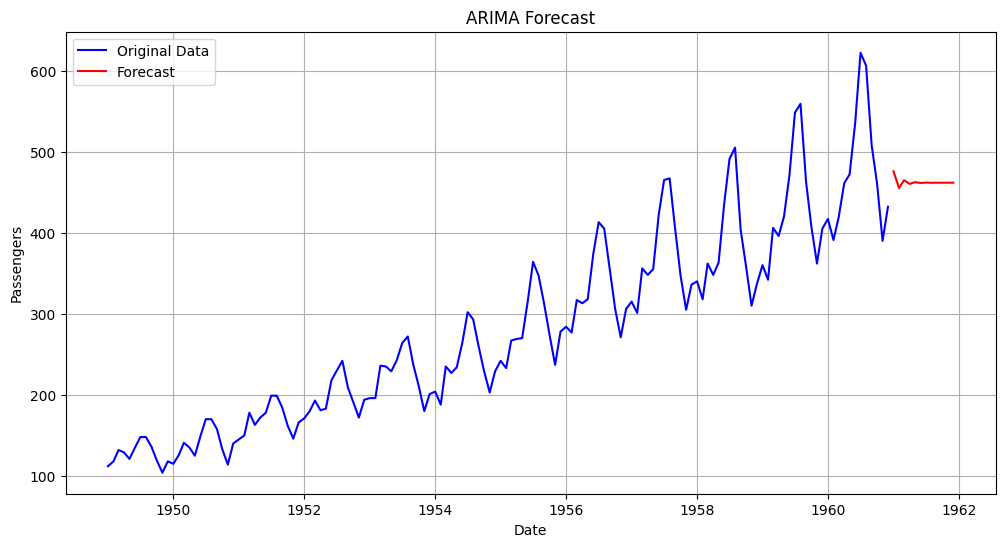

In [ ]:
# Create a date range for the forecast period
forecast_dates = pd.date_range(start=data1.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data1, label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

## **2. Exponential Smoothing (ETS) 🔮**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Fit the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(data1, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)

1961-01-01    451.577073
1961-02-01    427.257748
1961-03-01    464.699360
1961-04-01    500.103185
1961-05-01    508.660794
1961-06-01    567.713873
1961-07-01    647.897121
1961-08-01    632.460961
1961-09-01    534.374265
1961-10-01    484.930880
1961-11-01    418.459518
1961-12-01    471.058935
Freq: MS, dtype: float64


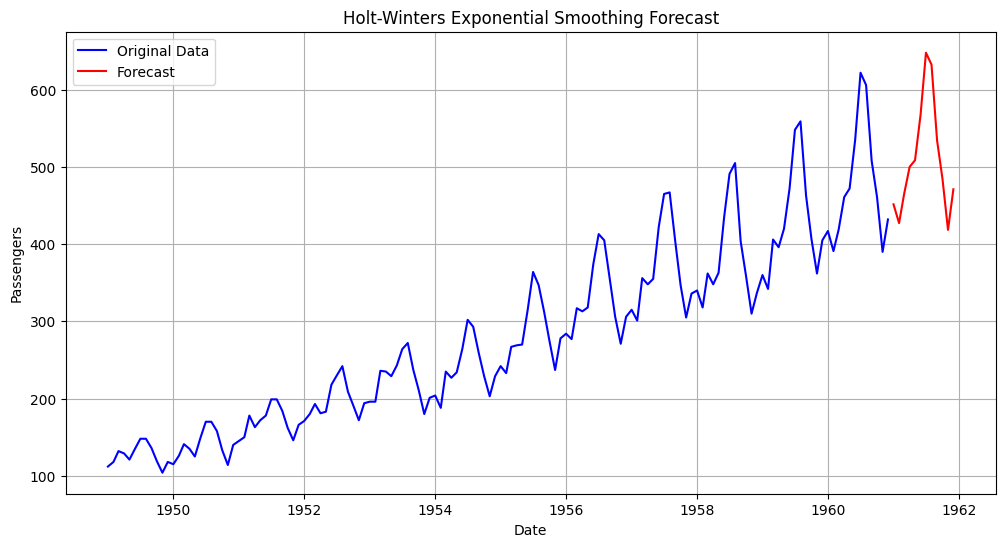

In [ ]:
# Create a date range for the forecast period
forecast_dates = pd.date_range(start=data1.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data1, label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

## **3. Modern Time Series Forecasting: Prophet 🔮**

### **📦 1. Install Prophet**

In [ ]:
pip install prophet

### **📥 2. Prepare the Data**

In [ ]:
# Load your dataset
data1 = pd.read_csv('/content/drive/MyDrive/3éme ING/S6/DA/AirPassengers.csv')

# Rename columns to match Prophet's expected format
data1.columns = ['ds', 'y']

# Convert the date column to datetime format
data1['ds'] = pd.to_datetime(data1['ds'])

print(data1.head())

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


### **🧗🏻‍♀️ 3. Initialize and Fit the Model**

In [ ]:
from prophet import Prophet
# Initialize Prophet model
model = Prophet()

# Fit the model to the historical data
model.fit(data1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgarb8n48/rsnv7sbs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgarb8n48/sjshvih1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36779', 'data', 'file=/tmp/tmpgarb8n48/rsnv7sbs.json', 'init=/tmp/tmpgarb8n48/sjshvih1.json', 'output', 'file=/tmp/tmpgarb8n48/prophet_modelchyx608o/prophet_model-20250525192755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **🎇 4. Make Predictions**

In [ ]:
# Create a dataframe for future predictions (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='MS')

# Generate forecasts
forecast = model.predict(future)

### **📉 5. Visualize the Forecast**

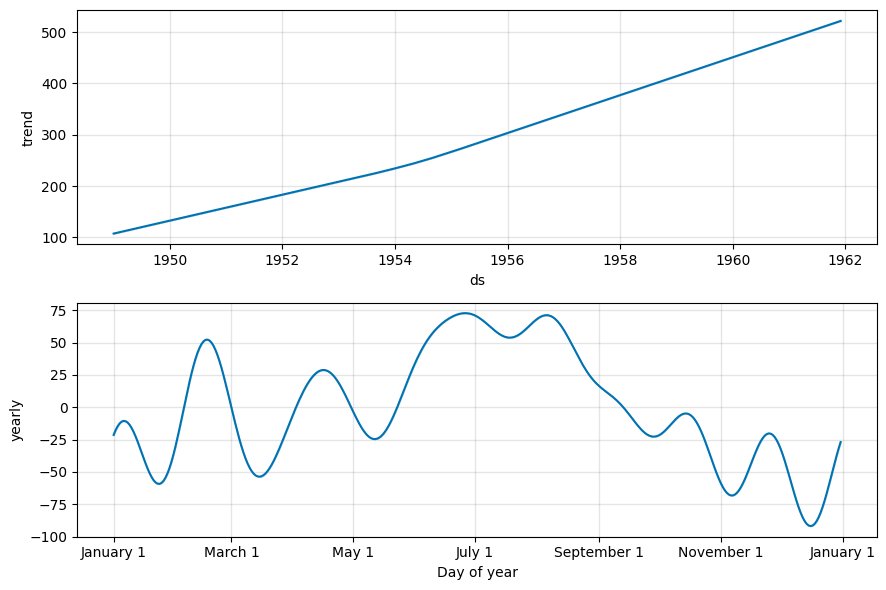

In [ ]:
# Plot the forecast
fig = model.plot_components(forecast)
plt.show()

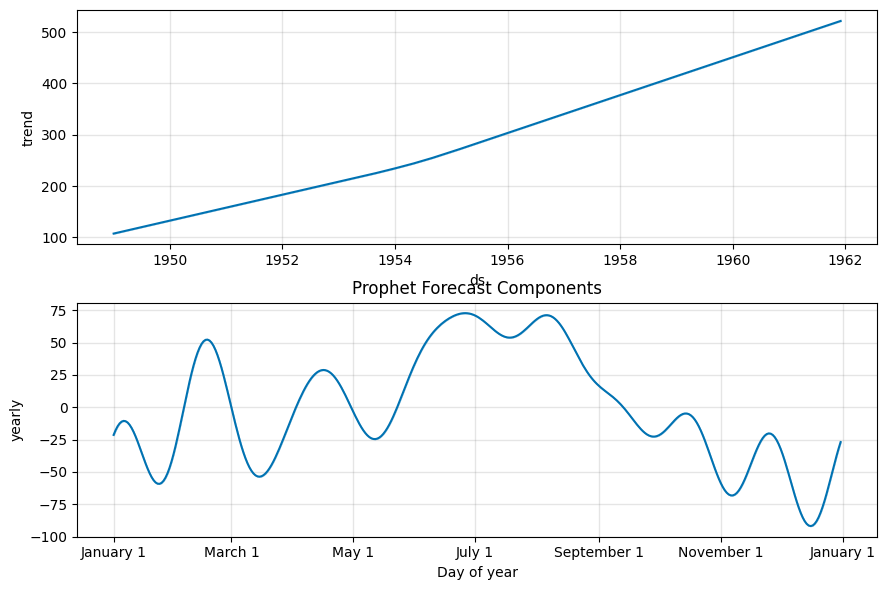

In [ ]:
# Plot forecast with actual data
fig = model.plot_components(forecast)
plt.title("Prophet Forecast Components")
plt.show()

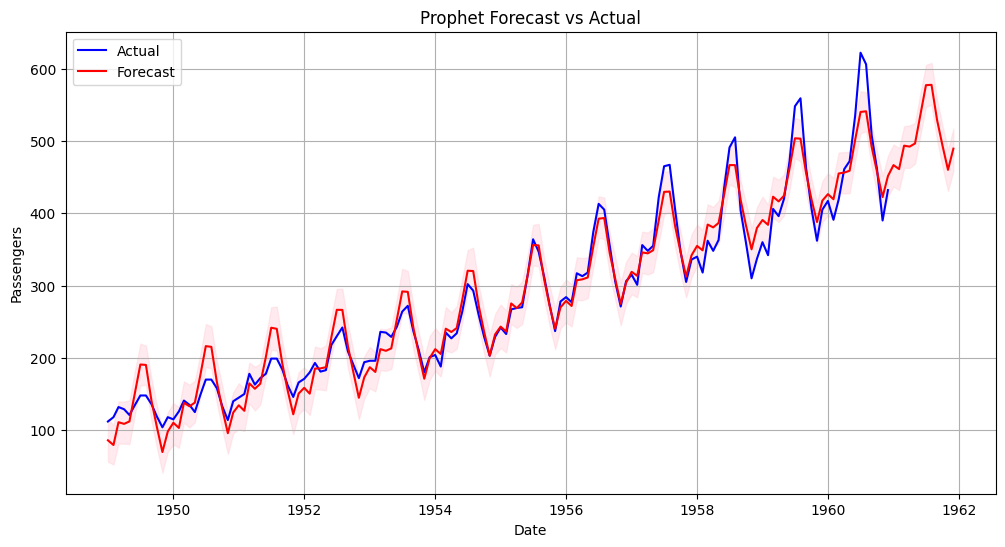

In [ ]:
# Manual plotting
plt.figure(figsize=(12, 6))
plt.plot(data1['ds'], data1['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()